In [1]:
import os
import sys

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleSkyPyLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo
from mejiro.helpers import pyhalo, pandeia_input, lenstronomy_sim
from mejiro.lenses.test import SampleSkyPyLens
from mejiro.utils import util

In [2]:
band = 'f106'

# use test lens
lens = SampleSkyPyLens()

# add CDM subhalos; NB same subhalo population for all
pickle_dir = os.path.join(pickle_dir, 'pyhalo')
lens.add_subhalos(*pyhalo.unpickle_subhalos(os.path.join(pickle_dir, 'cdm_subhalos_tuple')))

array = lens.get_array(num_pix=51, side=5.61)

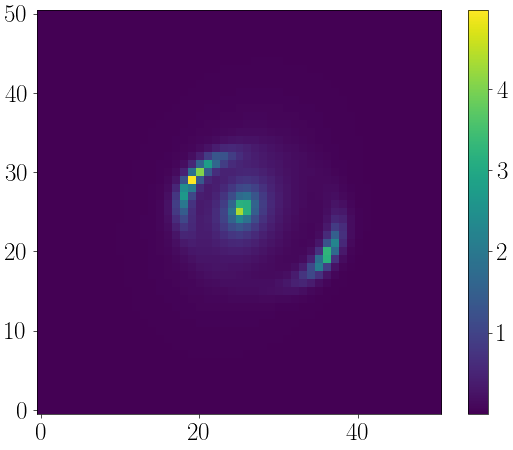

In [3]:
plot.plot(array, colorbar=True)

In [9]:
input = array
output_side = 51 * 3

In [11]:
input_side = input.shape[0]

if output_side % input_side != 0:
    raise Exception('Check input and output array sizes')

output = np.zeros((output_side, output_side))

In [ ]:
k, l = 0, 0

for i, row in enumerate(output):
    if (i % 3) % 2 == 0:
        continue
    for j, _ in enumerate(row):
        if (j % 3) % 2 == 0:
            continue
        output[i][j] = input[k][l]


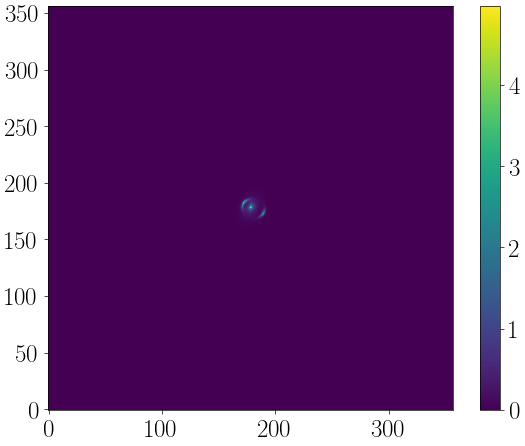

In [19]:
plot.plot(output, colorbar=True)